Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
The number of 250 nucleotide segments = 119
The highest score and location: [0.948, 15000] . The lowest score and location: [0.38, 0]


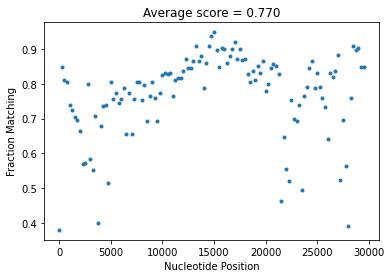

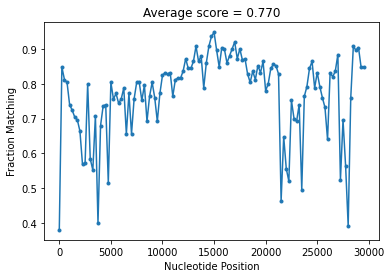

In [4]:
# look for identity between Sars-Cov and Sars-CoV-2
window = 250

import statistics as stats
import math
from matplotlib import pyplot as plt
import requests
from google.colab import drive
drive.mount('/content/gdrive')
filename1 = '/content/gdrive/Shared drives/2.Python/Covid-19/SARS-CoV-1 Genome.txt'
filename2 = '/content/gdrive/Shared drives/2.Python/Covid-19/SARS-CoV-2 Genome.txt'

with open(filename1, 'rb') as f:
  data1 = str(f.read())
  #print(data1[:100])
  #print(data1[-100:])
f.close()

cov1 =''
for x in data1:
  if x in ('A', 'T', 'C', 'G'):
    cov1 += x
#print(cov1[:100])

with open(filename2, 'rb') as g:
  data2 = str(g.read())
  #print(data2[:100])
  #print(data2[-100:])
g.close()

cov2 =''
for x in data2:
  if x in ('A', 'T', 'C', 'G'):
    cov2 += x
#print(cov2[:100])

pieces = []
for x in range(len(cov2) - window):
  if x % window ==0:
    pieces.append(cov2[x: x + window])
print('The number of' , window, 'nucleotide segments =', len(pieces))

def match(string1, string2):
  sum =0
  for x in range(len(string1)):
    if string1[x] == string2[x]:
      sum +=1
  ratio = sum / len(string1)
  return(ratio)

bestscores =[]
for x in range(len(pieces)):
  piecescores =[]
  for y in range(len(cov1) -window):
    piecescores.append(match(pieces[x], cov1[y: y +window]) )
  best = max(piecescores)
  bestscores.append([best, (x * window)])
print('The highest score and location:', max(bestscores), '. The lowest score and location:',min(bestscores))    

x1, y1 = [], []
for x in range(len(bestscores)):
  x1.append(bestscores[x][1])
  y1.append(bestscores[x][0])
plt.scatter(x1, y1, marker = '.')
plt.title('Average score = ' + str(sum(y1) / len(y1))[:5])
plt.xlabel('Nucleotide Position')
plt.ylabel('Fraction Matching')
plt.show()

plt.plot(x1, y1, marker = '.')
plt.title('Average score = ' + str(sum(y1) / len(y1))[:5])
plt.xlabel('Nucleotide Position')
plt.ylabel('Fraction Matching')
plt.show()
